<a href="https://colab.research.google.com/github/mission-ak47/Datascience/blob/main/Auto_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License
Copyright (c) 2023 Ashwin Kumar Kuchibhotla

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Copyright 2023 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


AUTO ML

The AutoML process typically involves the following steps:

Data preparation: Cleaning, preprocessing, and feature engineering the dataset to prepare it for modeling.

Model selection: Evaluating various algorithms, such as decision trees, random forests, logistic regression, and neural networks, to find the best one for the given task.

Hyperparameter tuning: Adjusting the parameters of the chosen algorithm to optimize its performance.

Model evaluation: Assessing the performance of the final model on a test dataset and comparing it to other models and benchmarks.

Deployment: Integrating the model into a production system and monitoring its performance over time.


ABSTRACT

The German Credit Data dataset is a popular dataset used for credit scoring and risk assessment. It contains 1,000 instances with 20 attributes, including demographic information, credit history, and other financial indicators, and a binary class label indicating whether the credit was granted or not. 

To apply AutoML to the German Credit Data dataset, we could use an AutoML tool or platform, such as H2O.ai, TPOT, or Google Cloud AutoML, which allows you to automatically generate and compare different models, and select the best-performing one based on various metrics, such as accuracy, precision, recall, and F1 score.

DataSet: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29
Features:

(1 = Good, 2 = Bad) Attribute Information:

Attribute 1: (qualitative) Status of existing checking account A11 : ... < 0 DM A12 : 0 <= ... < 200 DM A13 : ... >= 200 DM / salary assignments for at least 1 year A14 : no checking account

Attribute 2: (numerical) Duration in month

Attribute 3: (qualitative) Credit history A30 : no credits taken/ all credits paid back duly A31 : all credits at this bank paid back duly A32 : existing credits paid back duly till now A33 : delay in paying off in the past A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative) Purpose A40 : car (new) A41 : car (used) A42 : furniture/equipment A43 : radio/television A44 : domestic appliances A45 : repairs A46 : education A47 : (vacation - does not exist?) A48 : retraining A49 : business A410 : others

Attribute 5: (numerical) Credit amount

Attibute 6: (qualitative) Savings account/bonds A61 : ... < 100 DM A62 : 100 <= ... < 500 DM A63 : 500 <= ... < 1000 DM A64 : .. >= 1000 DM A65 : unknown/ no savings account

Attribute 7: (qualitative) Present employment since A71 : unemployed A72 : ... < 1 year A73 : 1 <= ... < 4 years A74 : 4 <= ... < 7 years A75 : .. >= 7 years

Attribute 8: (numerical) Installment rate in percentage of disposable income

Attribute 9: (qualitative) Personal status and sex A91 : male : divorced/separated A92 : female : divorced/separated/married A93 : male : single A94 : male : married/widowed A95 : female : single

Attribute 10: (qualitative) Other debtors / guarantors A101 : none A102 : co-applicant A103 : guarantor

Attribute 11: (numerical) Present residence since

Attribute 12: (qualitative) Property A121 : real estate A122 : if not A121 : building society savings agreement/ life insurance A123 : if not A121/A122 : car or other, not in attribute 6 A124 : unknown / no property

Attribute 13: (numerical) Age in years

Attribute 14: (qualitative) Other installment plans A141 : bank A142 : stores A143 : none

Attribute 15: (qualitative) Housing A151 : rent A152 : own A153 : for free

Attribute 16: (numerical) Number of existing credits at this bank

Attribute 17: (qualitative) Job A171 : unemployed/ unskilled - non-resident A172 : unskilled - resident A173 : skilled employee / official A174 : management/ self-employed/ highly qualified employee/ officer

Attribute 18: (numerical) Number of people being liable to provide maintenance for

Attribute 19: (qualitative) Telephone A191 : none A192 : yes, registered under the customers name

Attribute 20: (qualitative) foreign worker A201 : yes A202 : no

Installing Dependencies 

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 7.8 MB/s eta 0:00:00


Importing required modules

In [ ]:
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

2


In [ ]:
port_no = random.randint(5555, 55555)
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:25673..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkpjl6ybw
  JVM stdout: /tmp/tmpkpjl6ybw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkpjl6ybw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:25673
Connecting to H2O server at http://127.0.0.1:25673 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_60zm8k
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',delimiter=' ',header=None)

In [ ]:
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Target"]
df.columns=headers

Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)

Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["PS"]=df["Personal status and sex"].map(Personal_status_and_sex)

df[['Sex','Personal status']]=df.PS.str.split(':',expand=True)
df=df.drop(['PS','Personal status and sex'],1)

Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)

Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)

Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)

Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':1, 'A191':0}
df["Telephone"]=df["Telephone"].map(Telephone)

foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)

risk={1:1, 2:0}
df["Target"]=df["Target"].map(risk)

<ipython-input-219-2fb971d2d8dc>:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(['PS','Personal status and sex'],1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Other debtors / guarantors   

EDA

In [ ]:
df.isnull().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age                                                         0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job                                                         0
Number o

In [ ]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Other debtors / guarantors,Present residence since,...,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Target,Sex,Personal status
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,none,4,...,none,own,2,skilled employee / official,1,1,yes,1,male,single
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,none,2,...,none,own,1,skilled employee / official,1,0,yes,0,female,divorced/separated/married
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,none,3,...,none,own,1,unskilled - resident,2,0,yes,1,male,single
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,guarantor,4,...,none,for free,1,skilled employee / official,2,0,yes,1,male,single
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,none,4,...,none,for free,2,skilled employee / official,2,0,yes,0,male,single


In [ ]:
df.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Telephone,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.404000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000


This is a summary statistics table for the numeric variables in the dataset:

Duration in month: the duration of the loan in months.
Credit amount: the amount of the loan.
Installment rate in percentage of disposable income: the percentage of the borrower's income that goes towards repaying the loan.
Present residence since: the number of years the borrower has been living at their current residence.
Age: the age of the borrower in years.
Number of existing credits at this bank: the number of loans or credits the borrower has with this bank.
Number of people being liable to provide maintenance for: the number of people the borrower is financially responsible for.
Telephone: whether the borrower has a telephone (0=no, 1=yes).
Target: the target variable, which indicates whether the borrower was able to repay the loan (0=no, 1=yes).
The table shows the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values for each variable.

<AxesSubplot:>

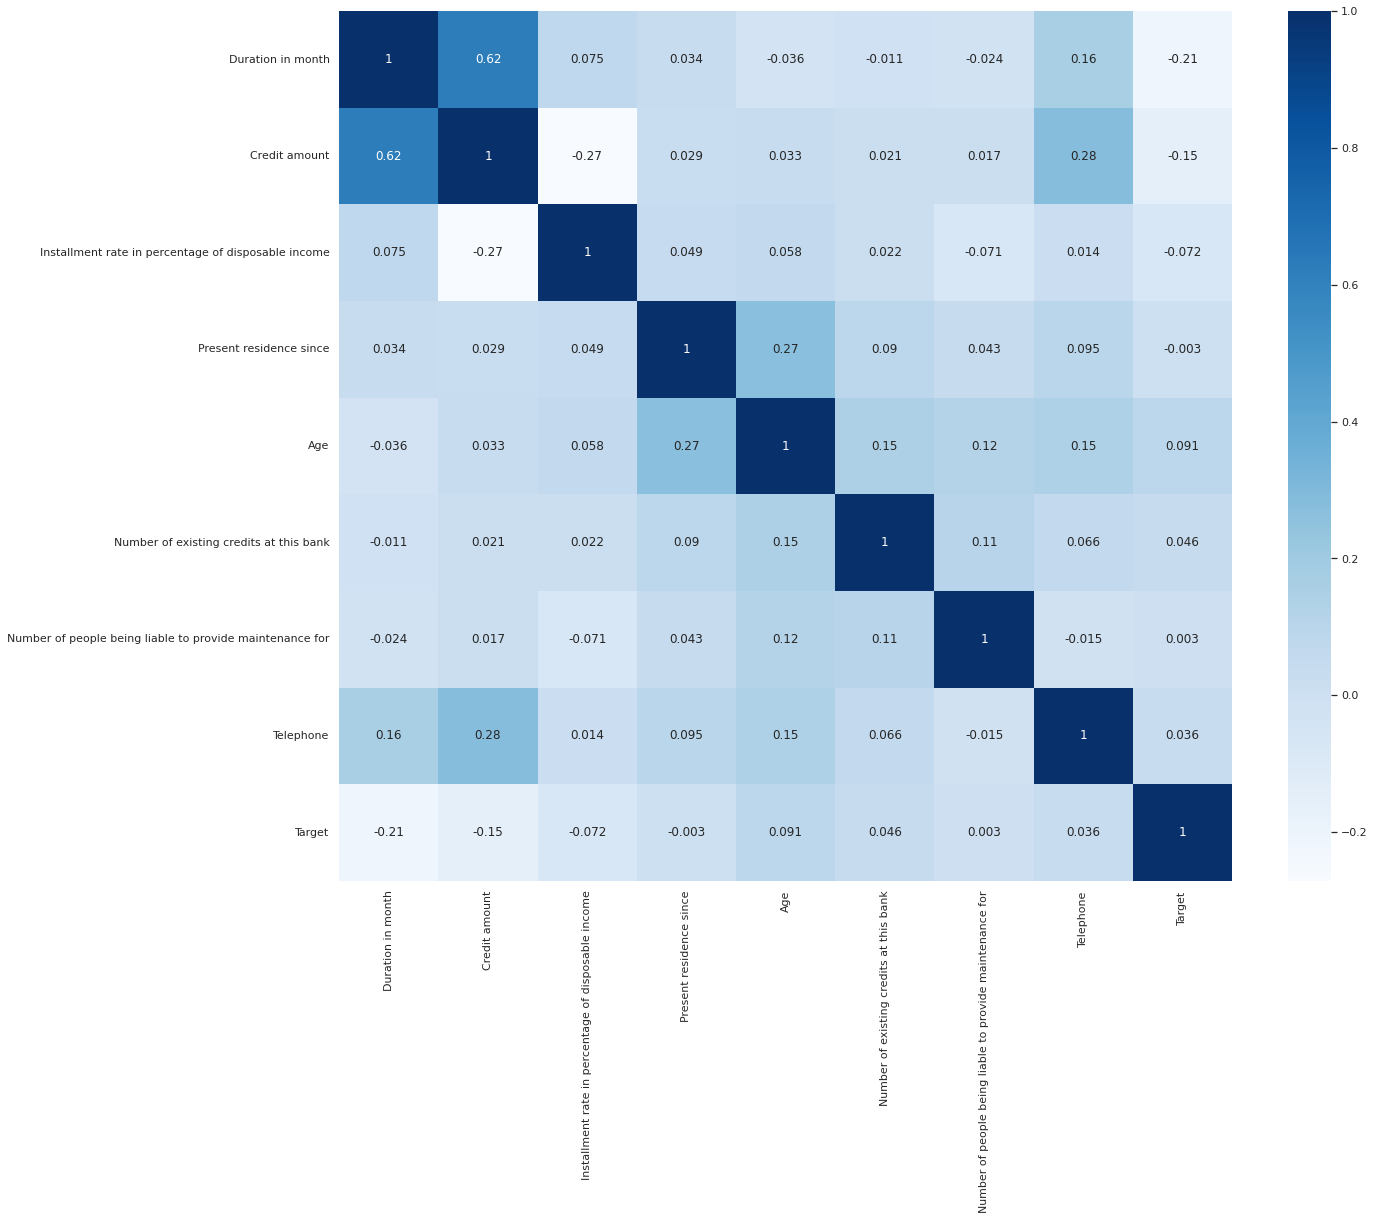

In [ ]:
# Generating heatmap
sns.set(rc={"figure.figsize": (20, 16)})
sns.heatmap(df.corr(), annot=True, cmap="Blues")

Correlation Analysis

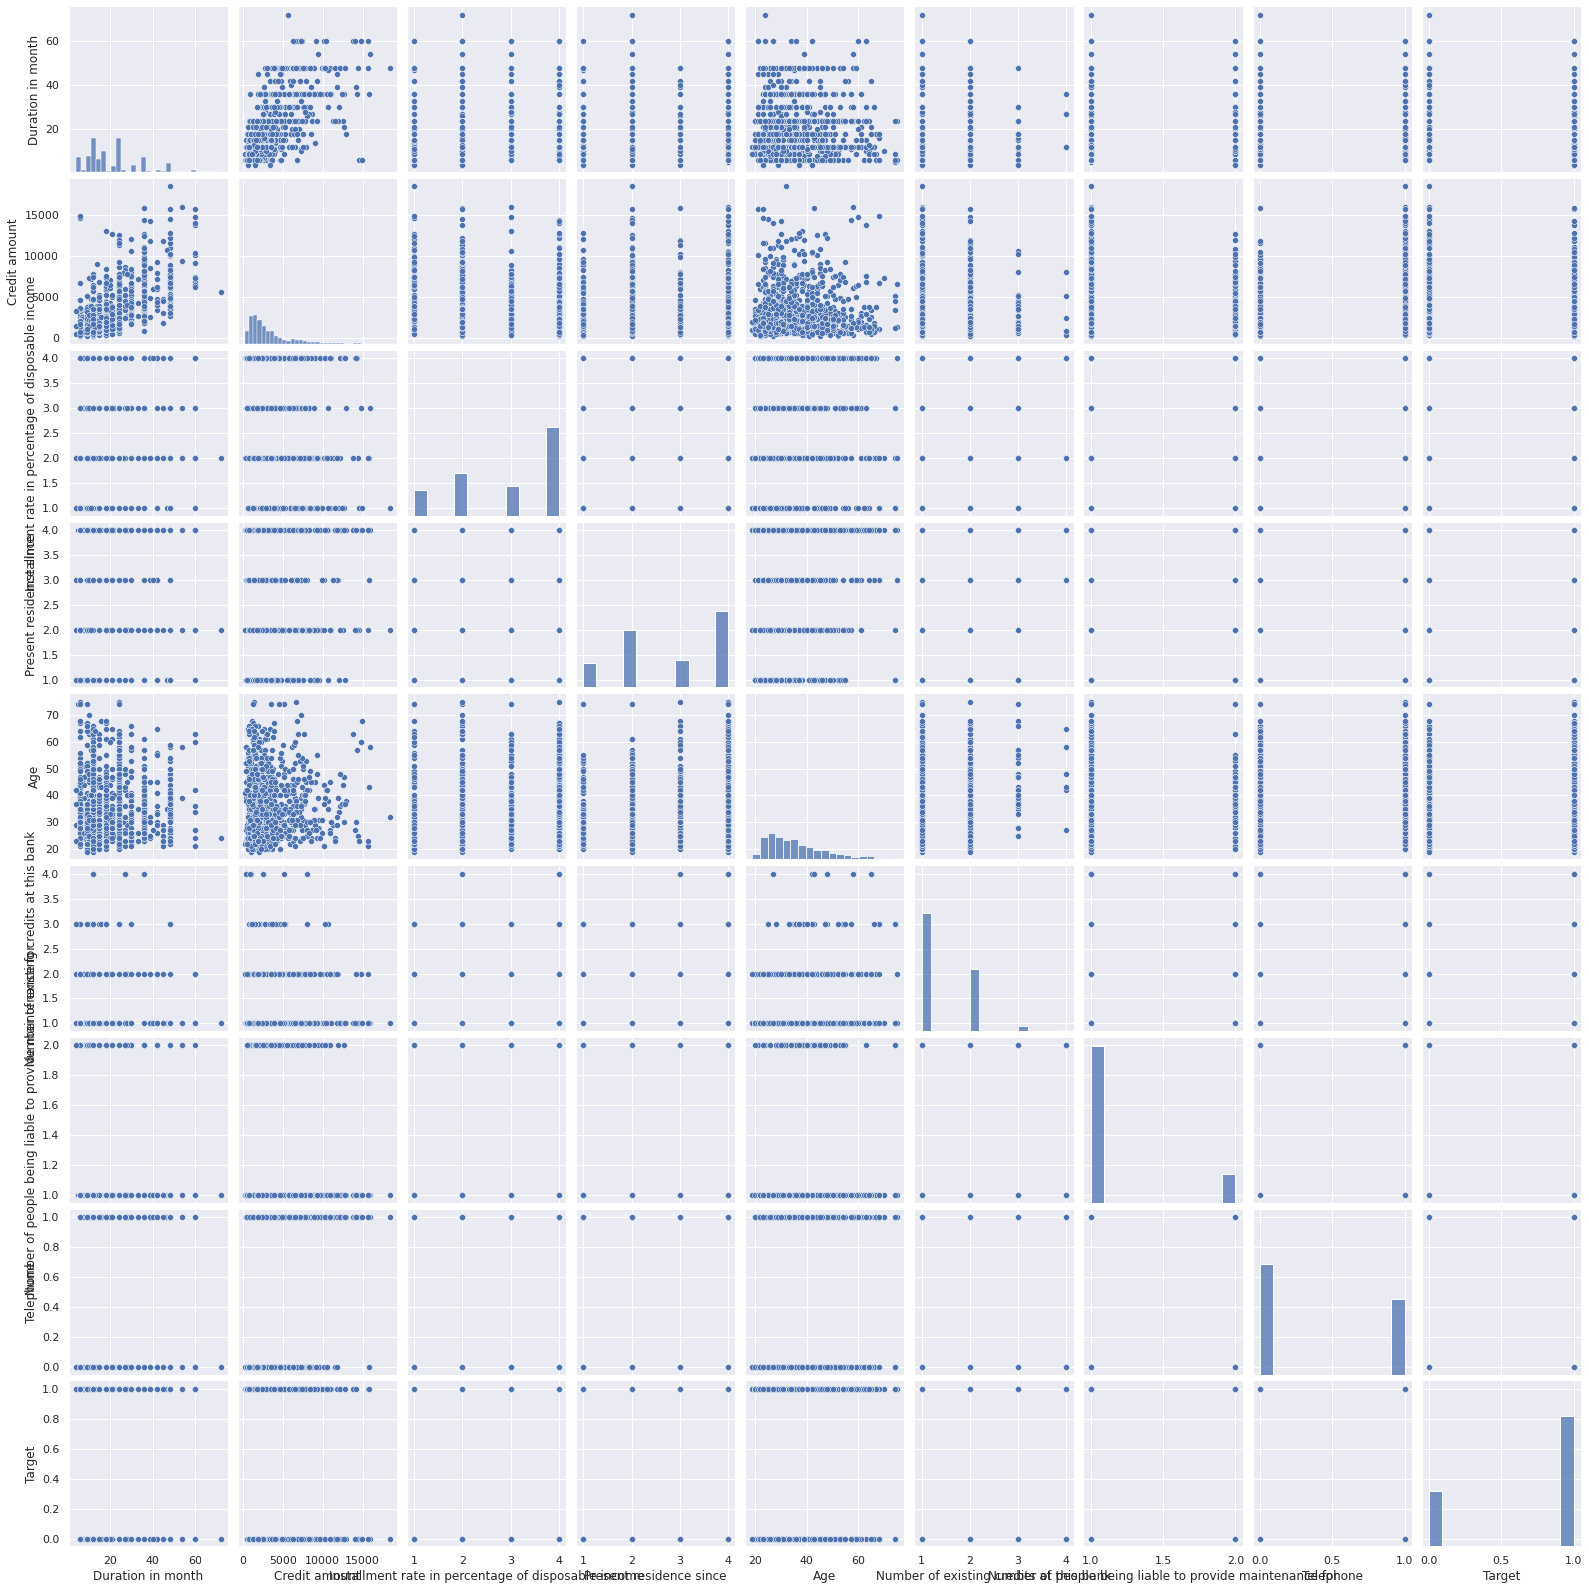

In [ ]:
sns.set(rc={"figure.figsize": (16, 8)})
sns.pairplot(df) 

In [ ]:
df = pd.DataFrame(df)
df['Status of existing checking account'] =df['Status of existing checking account'].astype('category').cat.codes
df['Credit history'] =df['Credit history'].astype('category').cat.codes
df['Purpose'] =df['Purpose'].astype('category').cat.codes
df['Savings account/bonds'] =df['Savings account/bonds'].astype('category').cat.codes
df['Present employment since'] =df['Present employment since'].astype('category').cat.codes
df['Other debtors / guarantors'] =df['Other debtors / guarantors'].astype('category').cat.codes
df['Property'] =df['Property'].astype('category').cat.codes
df['Other installment plans'] =df['Other installment plans'].astype('category').cat.codes
df['Housing'] =df['Housing'].astype('category').cat.codes
df['Job'] =df['Job'].astype('category').cat.codes
df['foreign worker'] =df['foreign worker'].astype('category').cat.codes
df['Sex'] =df['Sex'].astype('category').cat.codes
df['Personal status'] =df['Personal status'].astype('category').cat.codes

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


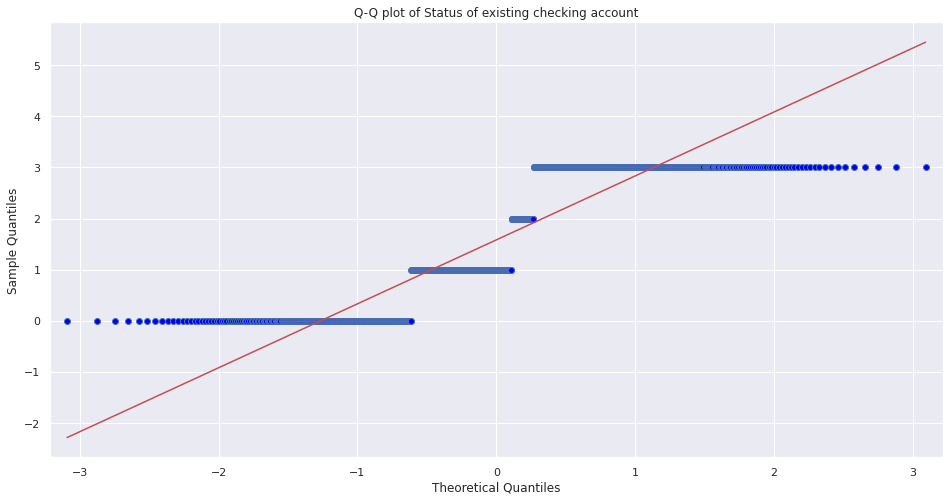

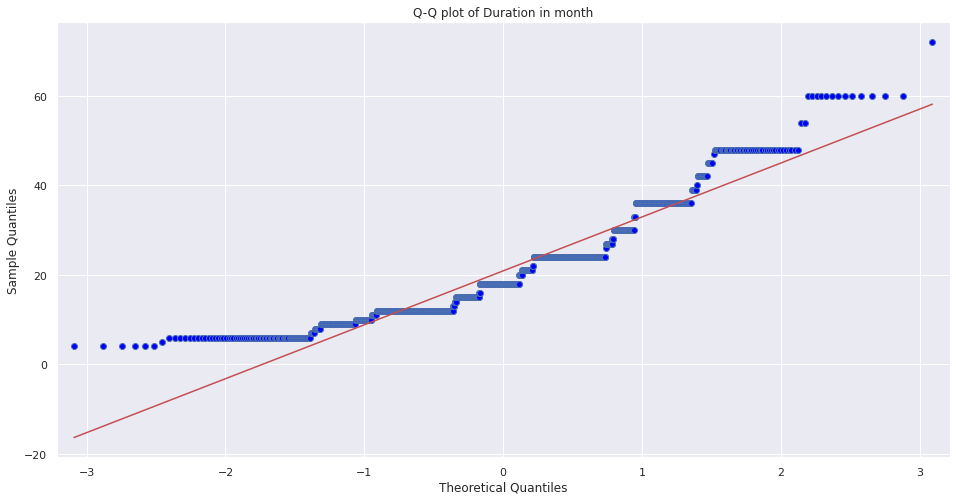

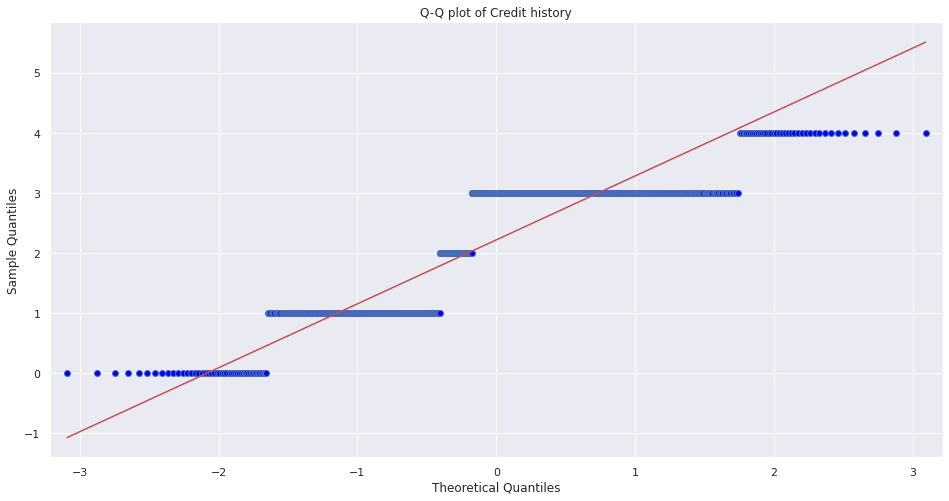

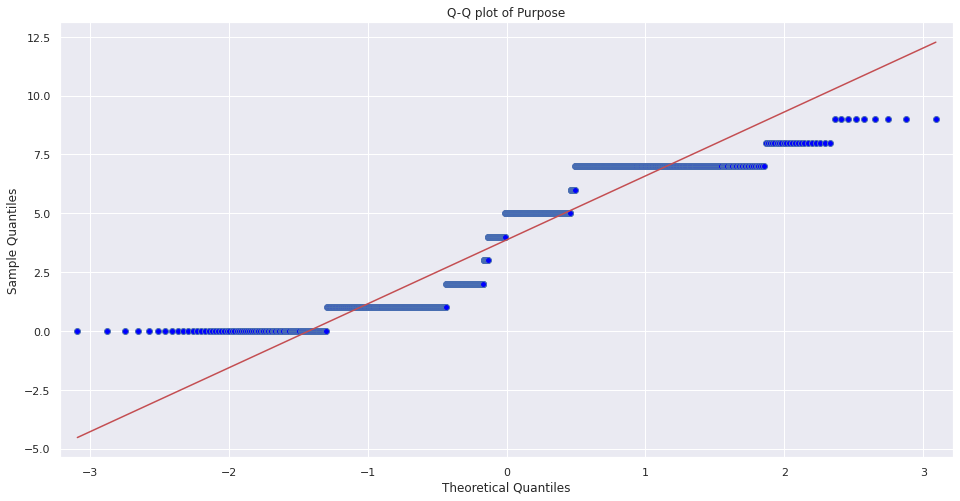

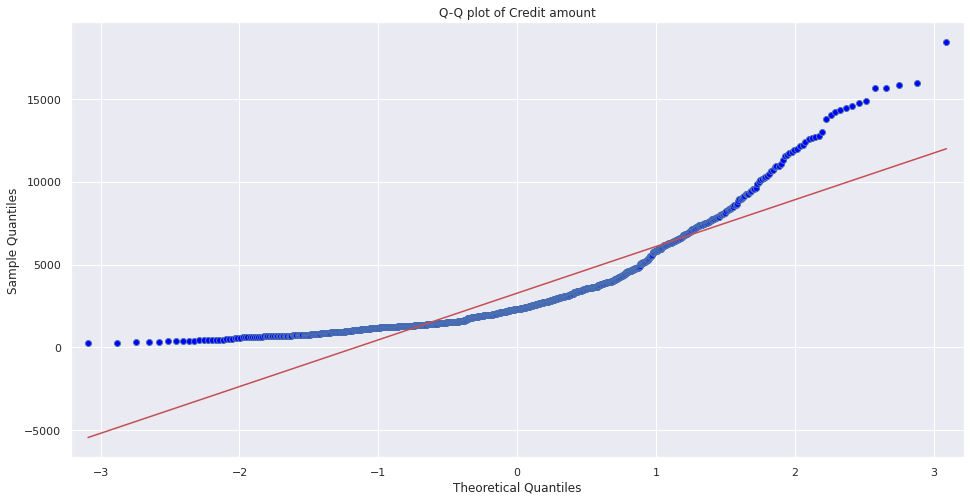

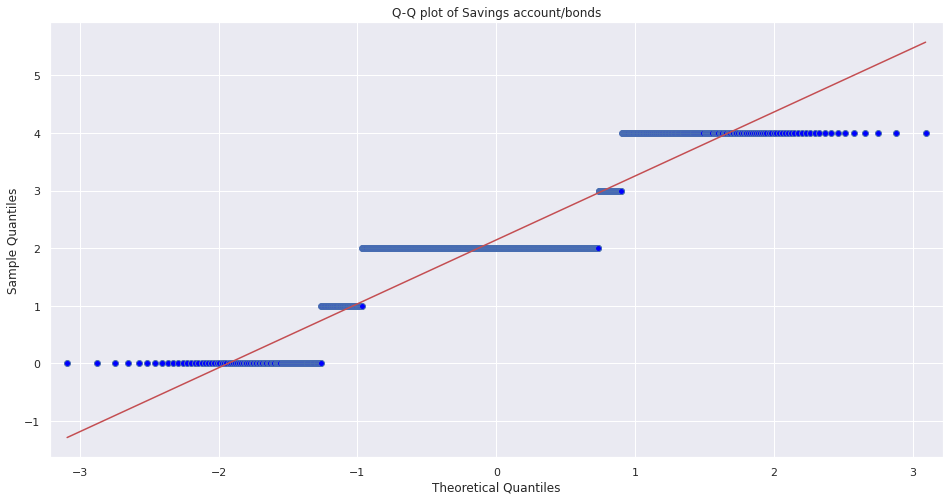

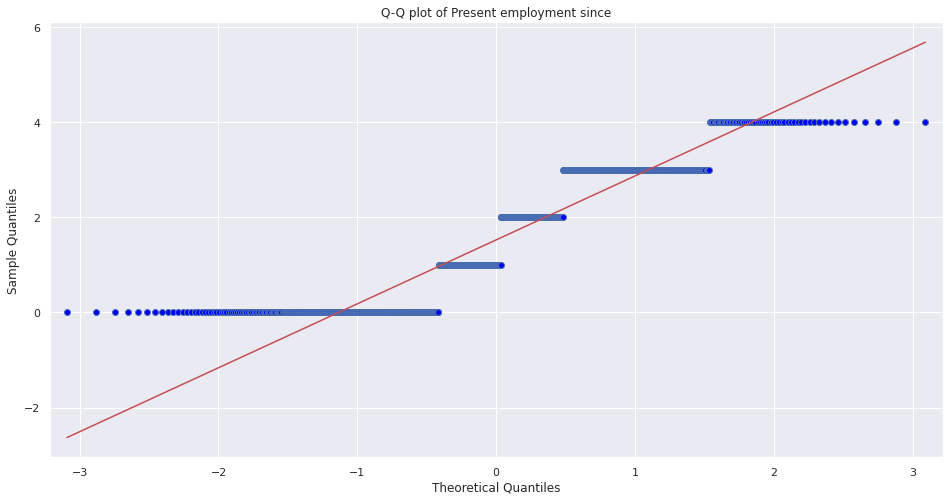

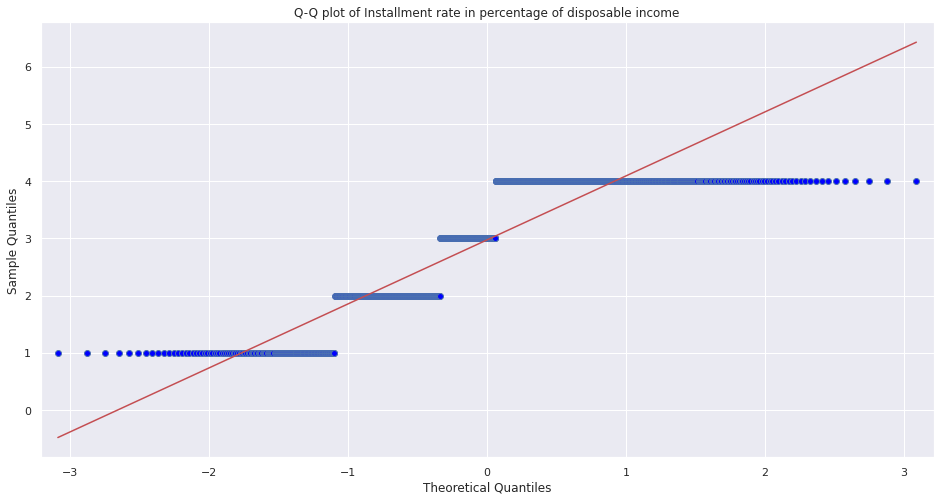

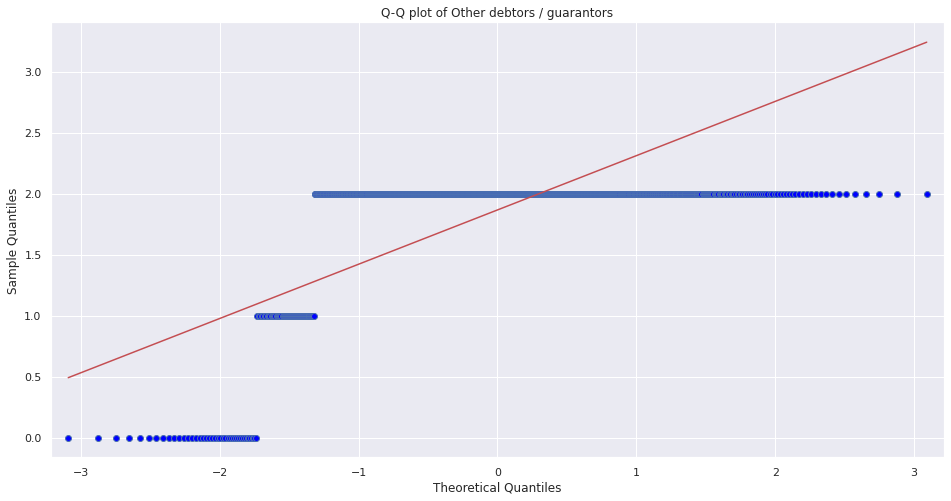

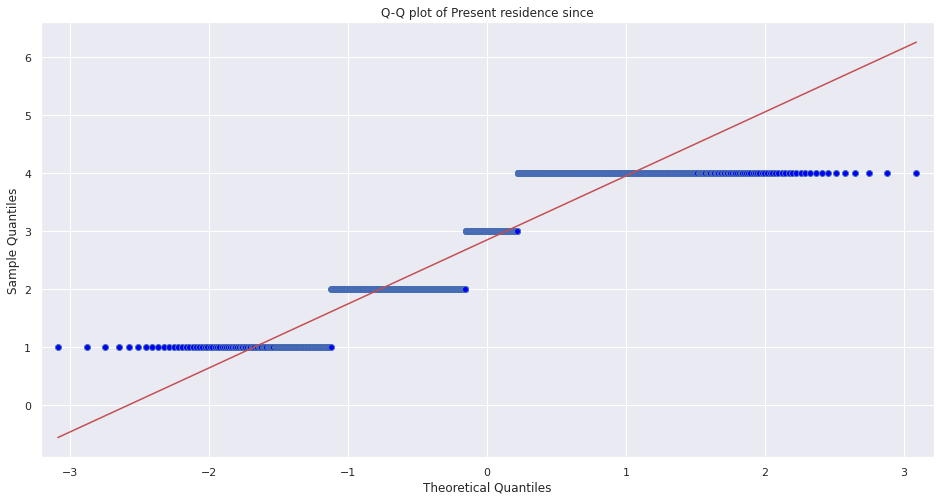

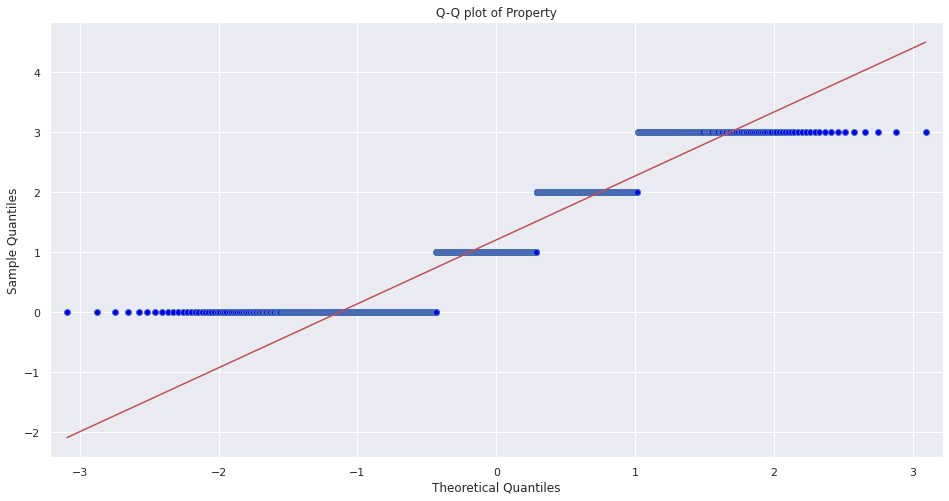

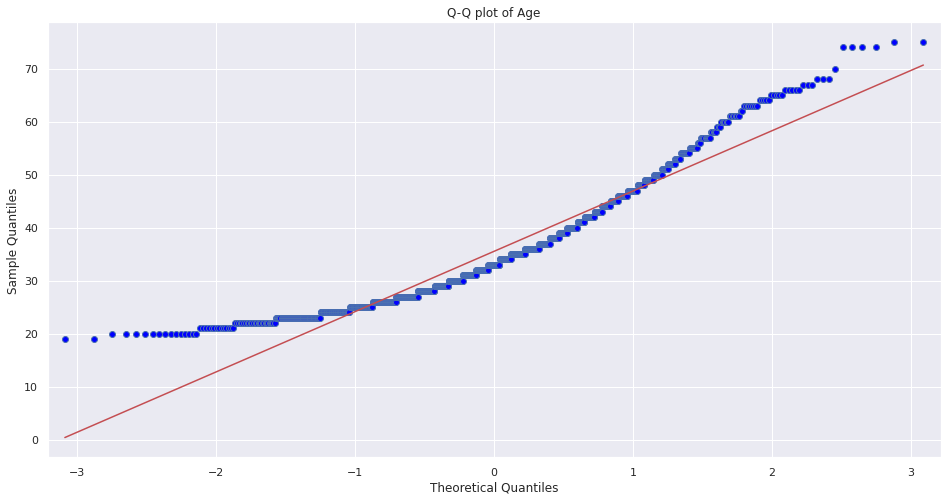

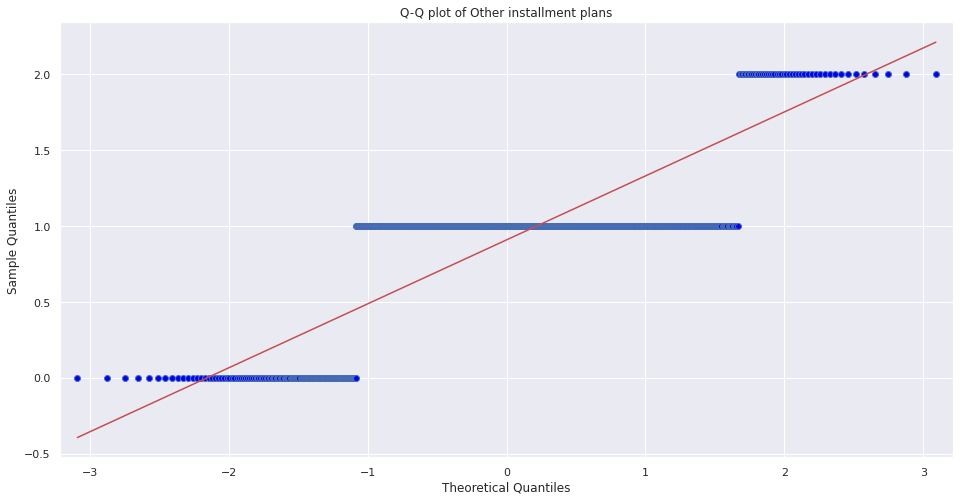

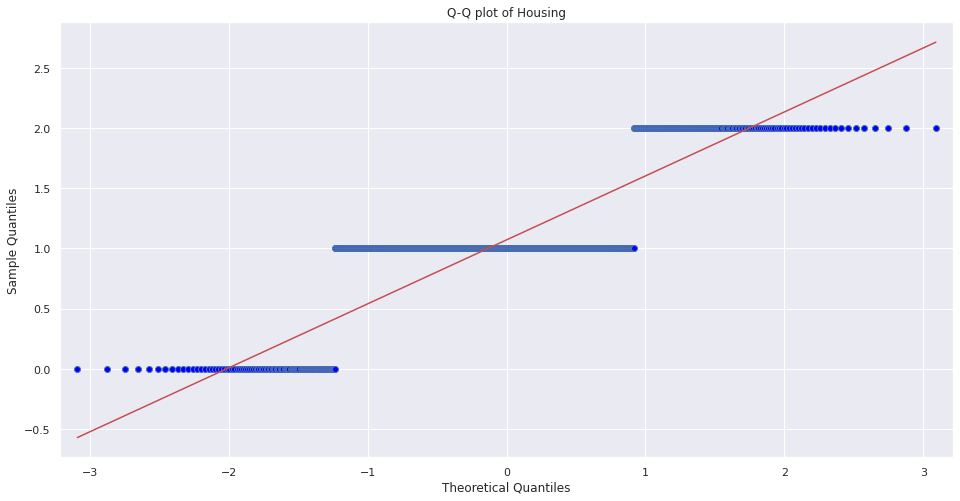

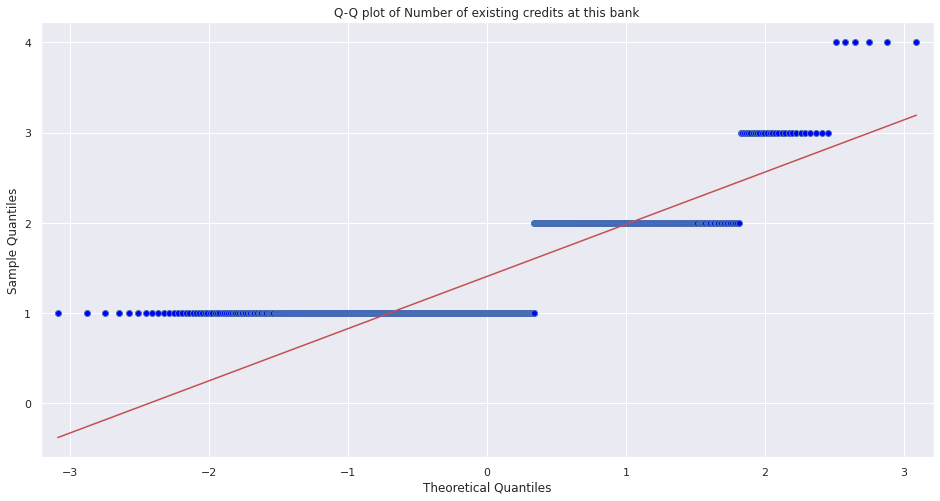

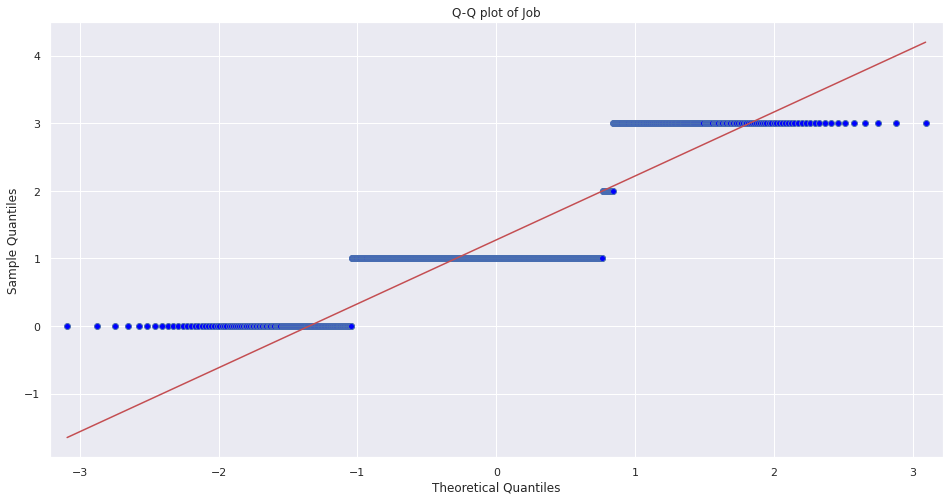

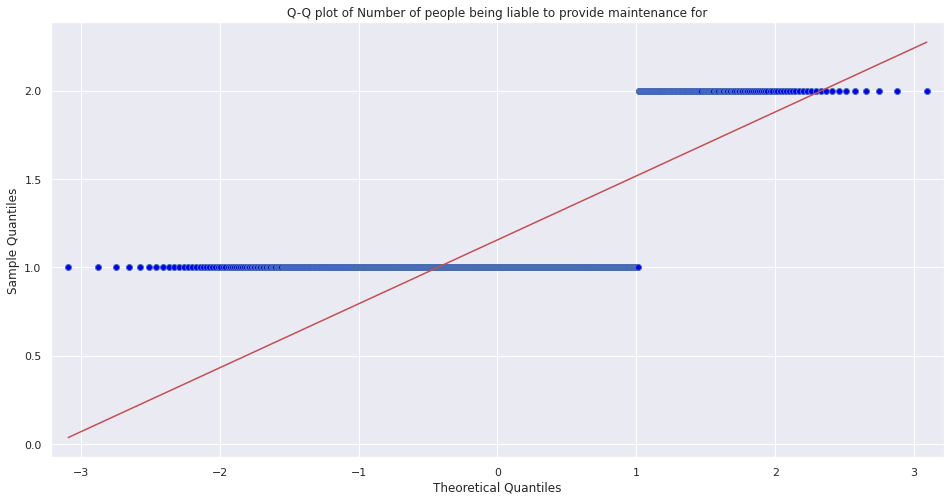

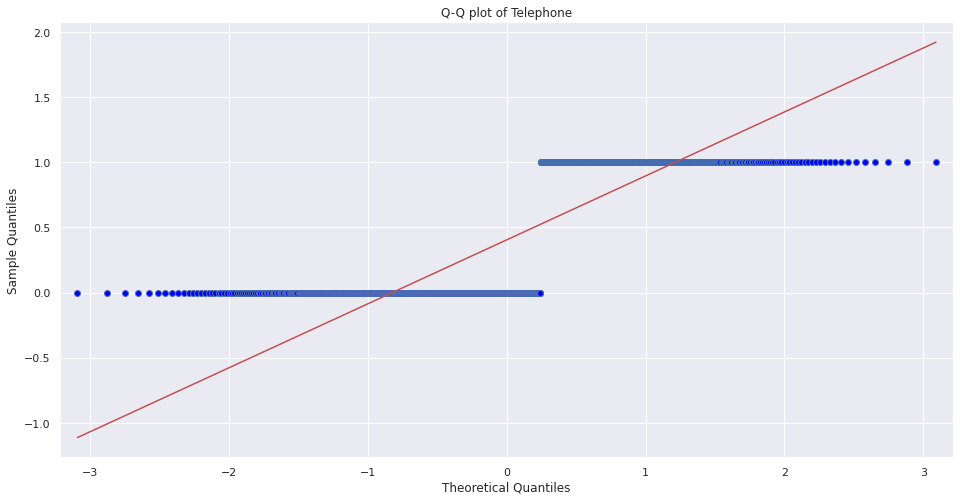

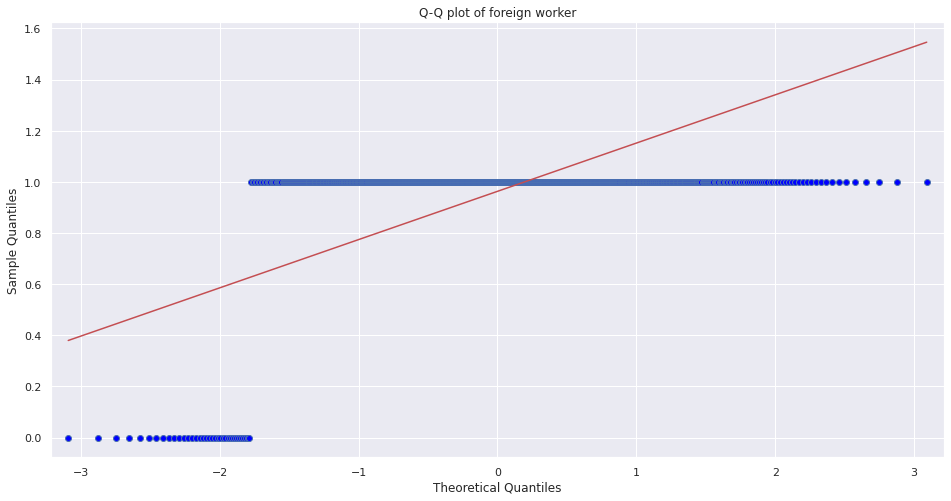

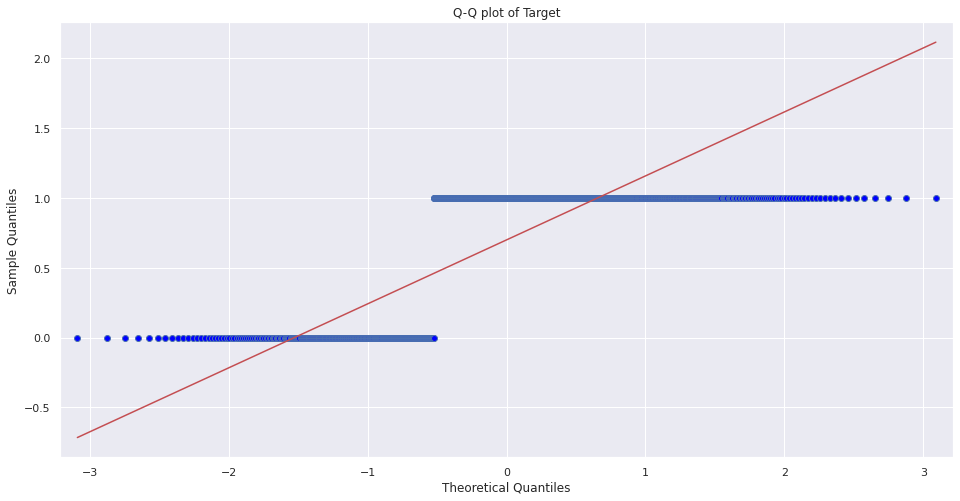

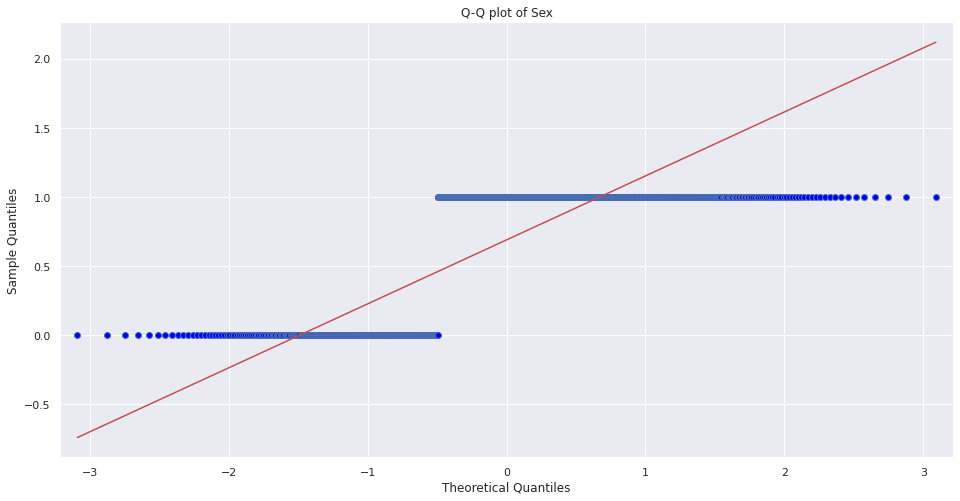

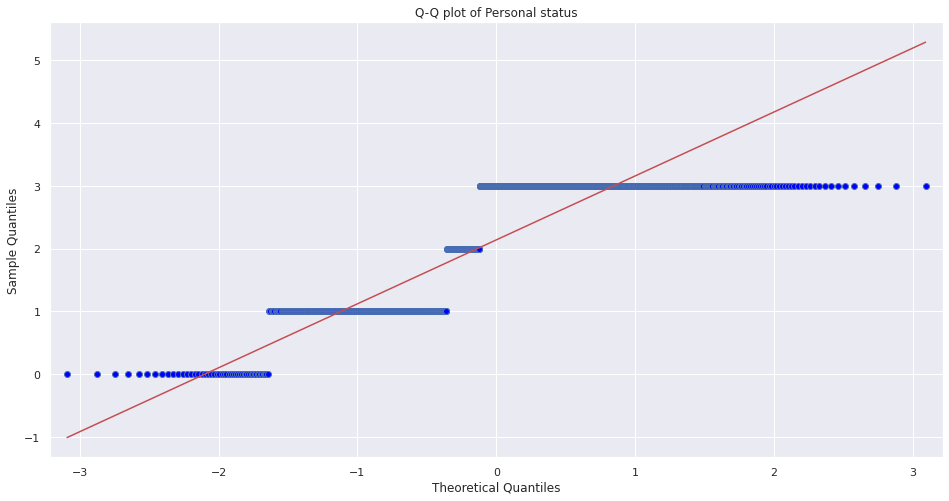

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
for col in df.columns:
  sm.qqplot(df[col], line='s')
  plt.title('Q-Q plot of ' + col)
  plt.show()

In [ ]:
h2odf = h2o.H2OFrame(df)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2odf.types  # Datatype of all attributes, here the result ("quality") is int hence it can be solved using the regression. If this problem was supposed to solved using the classification method - this attributes datatype must be converted into enum


{'Status of existing checking account': 'int',
 'Duration in month': 'int',
 'Credit history': 'int',
 'Purpose': 'int',
 'Credit amount': 'int',
 'Savings account/bonds': 'int',
 'Present employment since': 'int',
 'Installment rate in percentage of disposable income': 'int',
 'Other debtors / guarantors': 'int',
 'Present residence since': 'int',
 'Property': 'int',
 'Age': 'int',
 'Other installment plans': 'int',
 'Housing': 'int',
 'Number of existing credits at this bank': 'int',
 'Job': 'int',
 'Number of people being liable to provide maintenance for': 'int',
 'Telephone': 'int',
 'foreign worker': 'int',
 'Target': 'int',
 'Sex': 'int',
 'Personal status': 'int'}

In [ ]:
pct_rows = 0.70  # Setting up the data split between training and test dataset.
h2odf_train, h2odf_test = h2odf.split_frame([pct_rows])

In [ ]:
print(h2odf_train.shape)
print(h2odf_test.shape)

(699, 22)
(301, 22)


In [ ]:
h2odf_train.head()


Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Target,Sex,Personal status
1,6,1,7,1169,4,3,4,2,4,1,67,1,1,2,1,1,1,1,1,1,3
0,48,3,7,5951,2,0,2,2,2,1,22,1,1,1,1,1,0,1,0,0,1
3,12,1,4,2096,2,1,2,2,3,1,49,1,1,1,3,2,0,1,1,1,3
1,42,3,5,7882,2,1,2,1,4,2,45,1,0,1,1,2,0,1,1,1,3
3,36,3,4,9055,4,0,2,2,4,3,35,1,0,1,3,2,1,1,1,1,3
3,12,3,7,3059,3,1,2,2,4,1,61,1,1,1,3,1,0,1,1,1,0
0,30,1,1,5234,2,4,4,2,2,0,28,1,1,2,0,1,0,1,0,1,2
0,12,3,1,1295,2,2,3,2,1,0,25,1,2,1,1,1,0,1,0,0,1
1,24,1,1,1199,2,3,4,2,4,0,60,1,1,2,3,1,0,1,0,1,3
1,15,3,1,1403,2,0,2,2,4,0,28,1,2,1,1,1,0,1,1,0,1


In [ ]:
X = h2odf.columns
print(X)

['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment since', 'Installment rate in percentage of disposable income', 'Other debtors / guarantors', 'Present residence since', 'Property', 'Age', 'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'Target', 'Sex', 'Personal status']


In [ ]:
# Set target and predictor variables
y = "Target"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment since', 'Installment rate in percentage of disposable income', 'Other debtors / guarantors', 'Present residence since', 'Property', 'Age', 'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'Sex', 'Personal status']


In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [ ]:
aml.train(x=X, y=y, training_frame=h2odf_train)  # Trainig the dataset on different models

AutoML progress: |
03:18:37.195: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:18:39.633: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


03:18:40.645: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:18:42.664: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:18:42.939: _response param, We have detect

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
print(aml.leaderboard) 

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_31837  0.41609   0.173131  0.348903  0.291036                  0.173131
XGBoost_grid_1_AutoML_1_20230301_31837_model_28         0.41728   0.174123  0.349345  0.291064                  0.174123
StackedEnsemble_BestOfFamily_5_AutoML_1_20230301_31837  0.417378  0.174204  0.349387  0.291799                  0.174204
XGBoost_grid_1_AutoML_1_20230301_31837_model_56         0.418601  0.175227  0.347063  0.291447                  0.175227
XGBoost_grid_1_AutoML_1_20230301_31837_model_15         0.41883   0.175418  0.348752  0.291882                  0.175418
StackedEnsemble_AllModels_3_AutoML_1_20230301_31837     0.419312  0.175823  0.358182  0.294168                  0.175823
StackedEnsemble_AllModels_2_AutoML_1_20230301_31837     0.419605  0.176068  0.3496    0.293258                  0.176068
GBM_grid_1_AutoML_1_20230301_318

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
  models_dict[m] = model_index
  if "StackedEnsemble" not in m:
    break
  model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
  if "GLM" in m:
    models_dict[m] = glm_index
    break
  glm_index = glm_index + 1
models_dict

{'StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_31837': 0,
 'XGBoost_grid_1_AutoML_1_20230301_31837_model_28': 1,
 'GLM_1_AutoML_1_20230301_31837': 37}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

1


In [ ]:
best_model.algo


'xgboost'

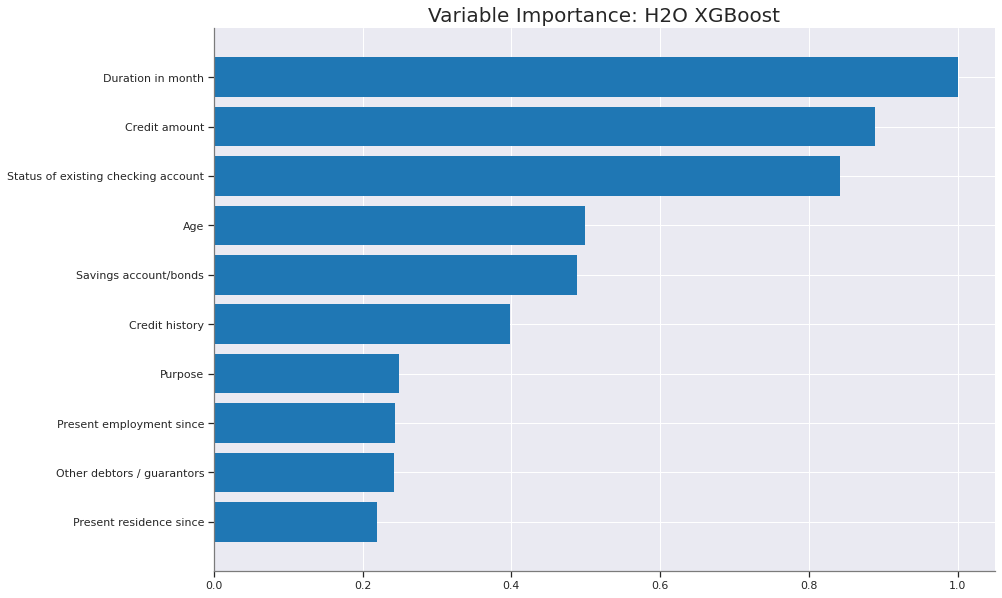

<Figure size 1152x576 with 0 Axes>

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-242-c0ead3f99866>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


37
glm


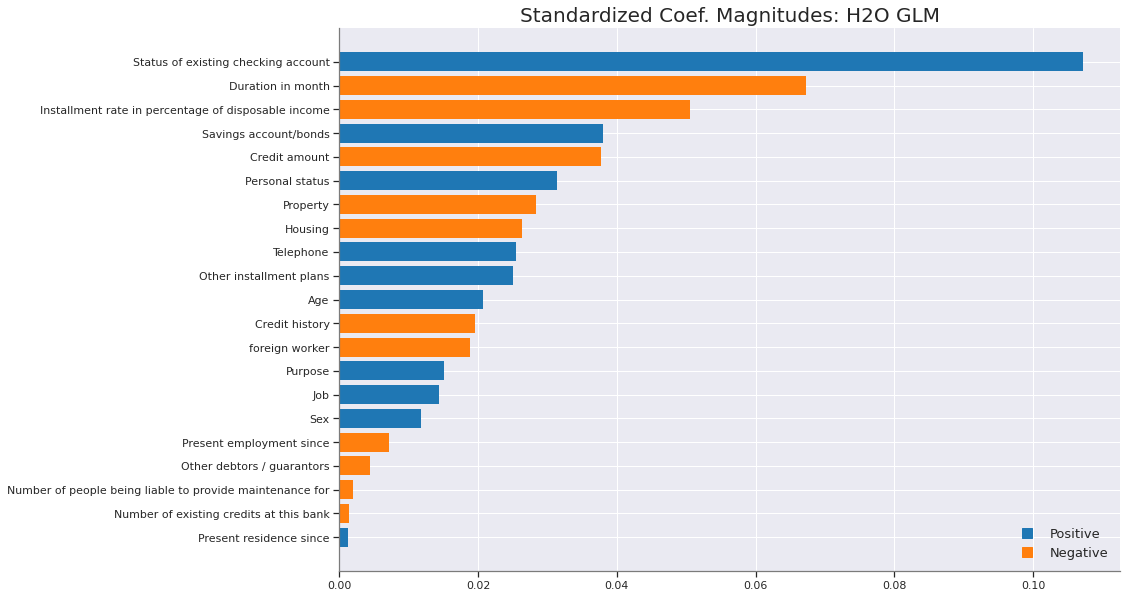

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
  print(glm_model.algo)
  glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train=True))

0.3374277966805509


In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [ ]:
mod_perf = best_model.model_performance(h2odf_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.15865666991991284,
 'rmse': 0.398317298042544,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [ ]:
predictions = best_model.predict(h2odf_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

      predict
0    0.425838
1    0.882517
2    0.399743
3    0.174084
4    0.537723
..        ...
296  0.304228
297  0.585266
298  0.319584
299  0.944503
300  0.844708

[301 rows x 1 columns]


In [ ]:
y_test = h2o.as_list(h2odf_test[y])  # Real Answers
y_test

,Target
0,0
1,1
2,1
3,0
4,1
...,...
296,1
297,1
298,1
299,1


In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

loan_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
loan_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
loan_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
loan_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [ ]:
loan_glm.train(x=X, y=y, training_frame=h2odf_train)

glm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,None,21,21,1,py_730_sid_a205
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.3754420,0.0167153,0.3665766,0.3774289,0.3895934,0.3919098,0.3517016
mean_residual_deviance,0.1925204,0.0183842,0.1832973,0.1952263,0.2117222,0.2063071,0.1660489
mse,0.1925204,0.0183842,0.1832973,0.1952263,0.2117222,0.2063071,0.1660489
null_deviance,30.290709,2.430381,29.11179,30.997528,33.88927,27.33096,30.123997
r2,0.1048226,0.0864921,0.1148982,0.1563435,0.0534356,-0.0109050,0.2103409
residual_deviance,26.91708,3.112844,25.661629,25.769873,31.970057,27.438848,23.744993
rmse,0.4383622,0.0211833,0.4281324,0.4418442,0.4601328,0.4542105,0.407491
rmsle,0.3049576,0.0137187,0.2966980,0.3122654,0.3198590,0.3104696,0.2854960


In [ ]:
loan_glm_regularization_ridge.train(x=X, y=y, training_frame=h2odf_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 1.428E-4 ),21,21,1,py_730_sid_a205
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.3706157,0.0109237,0.3805164,0.37818,0.3659004,0.3537873,0.3746942
mean_residual_deviance,0.1898184,0.0098156,0.2050209,0.1927175,0.1819137,0.1886815,0.1807584
mse,0.1898184,0.0098156,0.2050209,0.1927175,0.1819137,0.1886815,0.1807584
null_deviance,30.263424,2.4871545,33.798134,30.663162,29.392458,26.909767,30.5536
r2,0.1206331,0.0461706,0.0863595,0.0650534,0.1813885,0.1438003,0.1265636
residual_deviance,26.57571,3.180347,30.75314,28.522188,24.012604,23.019138,26.571482
rmse,0.4355667,0.0111829,0.4527924,0.4389960,0.4265134,0.4343748,0.4251569
rmsle,0.3038360,0.0111531,0.3216016,0.3022298,0.3012008,0.3034370,0.2907110


In [ ]:
loan_glm_regularization_lasso.train(x=X, y=y, training_frame=h2odf_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 1.428E-4 ),21,21,1,py_730_sid_a205
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.3729376,0.0244092,0.3899732,0.3540333,0.4039999,0.3714680,0.3452135
mean_residual_deviance,0.1913516,0.0219397,0.2036508,0.1753852,0.2198329,0.1930894,0.1647998
mse,0.1913516,0.0219397,0.2036508,0.1753852,0.2198329,0.1930894,0.1647998
null_deviance,30.348408,4.3883286,31.789793,33.04404,32.090736,32.275284,22.542185
r2,0.1038945,0.0470686,0.0930148,0.1825010,0.0573046,0.1025589,0.0840933
residual_deviance,26.795225,4.13368,28.714764,27.009317,29.677446,28.963415,19.61118
rmse,0.4368611,0.0251009,0.4512769,0.4187901,0.4688635,0.4394194,0.4059554
rmsle,0.3038938,0.0211023,0.3165372,0.2940585,0.3300069,0.3040028,0.2748638


In [ ]:
lambda_search = loan_glm_regularization_lamba_search.train(x=X, y=y, training_frame=h2odf_train)
lambda_search

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677640615306_34


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.002484 )  nlambda = 100, lambda.max = 0.2856, lambda.min = 0.002484, lambda.1se = -1.0  21                            20                             52                      py_730_sid_a205

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.17613468680639893
RMSE: 0.41968403210796446
MAE: 0.3597353281334599
RMSLE: 0.2941498869742121
Mean Residual Deviance: 0.17613468680639893
R^2: 0.18533497313189073
Null degrees of freedom: 698
Residual degrees of freedom: 678
Null deviance: 151.12732474964216
Residual deviance: 123.11814607767286
AIC: 813.8581582651451

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse        training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  -------------------  -------------------  ------------------  -------------------
     2023-03-01 03:22:30  0.000 sec   1            .29E0     1             0.2162050425602895   0.5
     2023-03-01 03:22:30  0.001 sec   2            .26E0     2             0.21312208117645634  0.5
     2023-03-01 03:22:30  0.002 sec   3            .24E0     2             0.21047874182355686  0.5
     2023-03-01 03:22:30  0.002 sec   4            .22E0     2             0.20821812395172482  0.5
     2023-03-01 03:22:30  0.003 sec   5            .2E0      3             0.20506808636801951  0.5
     2023-03-01 03:22:30  0.004 sec   6            .18E0     3             0.20212709471005924  0.5
     2023-03-01 03:22:30  0.004 sec   7            .16E0     3             0.19963291442181624  0.5
     2023-03-01 03:22:30  0.005 sec   8            .15E0     3             0.19752127961121238  0.5
     2023-03-01 03:22:30  0.006 sec   9            .14E0     3             0.19573642260899002  0.5
     2023-03-01 03:22:30  0.011 sec   10           .12E0     3             0.1942300352547921   0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                  ---                  ---                 ---
     2023-03-01 03:22:30  0.054 sec   43           .57E-2    19            0.1762941494763023   0.5
     2023-03-01 03:22:30  0.055 sec   44           .52E-2    20            0.17626388540369334  0.5
     2023-03-01 03:22:30  0.055 sec   45           .48E-2    20            0.17623758437801504  0.5
     2023-03-01 03:22:30  0.057 sec   46           .43E-2    21            0.17621557397511325  0.5
     2023-03-01 03:22:30  0.057 sec   47           .4E-2     21            0.17619518949847257  0.5
     2023-03-01 03:22:30  0.058 sec   48           .36E-2    21            0.17617820636870102  0.5
     2023-03-01 03:22:30  0.058 sec   49           .33E-2    21            0.17616412779178692  0.5
     2023-03-01 03:22:30  0.059 sec   50           .3E-2     21            0.1761524276562979   0.5
     2023-03-01 03:22:30  0.059 sec   51           .27E-2    21            0.1761427600210933   0.5
     2023-03-01 03:22:30  0.060 sec   52           .25E-2    21            0.17613468680639935  0.5      52            0.41968403210796446  0.17613468680639893  0.3597353281334599  0.18533497313189073
[52 row

In [ ]:
coeff_table = loan_glm._model_json["output"]["coefficients_table"]
coeff_table.as_data_frame() 

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,0.829831,0.182682,4.542494,6.581837e-06,0.683834
1,Status of existing checking account,0.094465,0.013290,7.107785,2.999977e-12,0.118396
2,Duration in month,-0.005879,0.001813,-3.242835,1.241562e-03,-0.073146
3,Credit history,-0.020337,0.016866,-1.205829,2.283046e-01,-0.021675
4,Purpose,0.005988,0.006309,0.949095,3.429108e-01,0.016170
5,Credit amount,-0.000014,0.000009,-1.681637,9.310045e-02,-0.041937
6,Savings account/bonds,0.037564,0.014864,2.527118,1.172686e-02,0.041767
7,Present employment since,-0.005408,0.013284,-0.407148,6.840277e-01,-0.007187
8,Installment rate in percentage of disposable i...,-0.053922,0.016855,-3.199062,1.443069e-03,-0.059157
9,Other debtors / guarantors,-0.016608,0.038692,-0.429221,6.678991e-01,-0.007144


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_1_20230301_31837_model_43,0.392255,0.153864,0.315081,0.269274,0.153864,51,0.005714,XGBoost
GBM_grid_1_AutoML_1_20230301_31837_model_8,0.394922,0.155963,0.324933,0.273508,0.155963,342,0.0188,GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_31837,0.395923,0.156755,0.319512,0.274111,0.156755,138,0.046208,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20230301_31837,0.395923,0.156755,0.319512,0.274111,0.156755,151,0.051167,StackedEnsemble
GBM_grid_1_AutoML_1_20230301_31837_model_1,0.39693,0.157553,0.331251,0.275574,0.157553,89,0.012648,GBM
XGBoost_grid_1_AutoML_1_20230301_31837_model_47,0.397053,0.157651,0.318152,0.274142,0.157651,73,0.005329,XGBoost
GBM_grid_1_AutoML_1_20230301_31837_model_9,0.397064,0.15766,0.327229,0.275639,0.15766,100,0.010551,GBM
StackedEnsemble_AllModels_1_AutoML_1_20230301_31837,0.397109,0.157696,0.320936,0.274552,0.157696,263,0.056664,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_31837,0.39741,0.157935,0.322014,0.275003,0.157935,228,0.022298,StackedEnsemble
GBM_grid_1_AutoML_1_20230301_31837_model_5,0.397865,0.158296,0.318305,0.275245,0.158296,142,0.011216,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

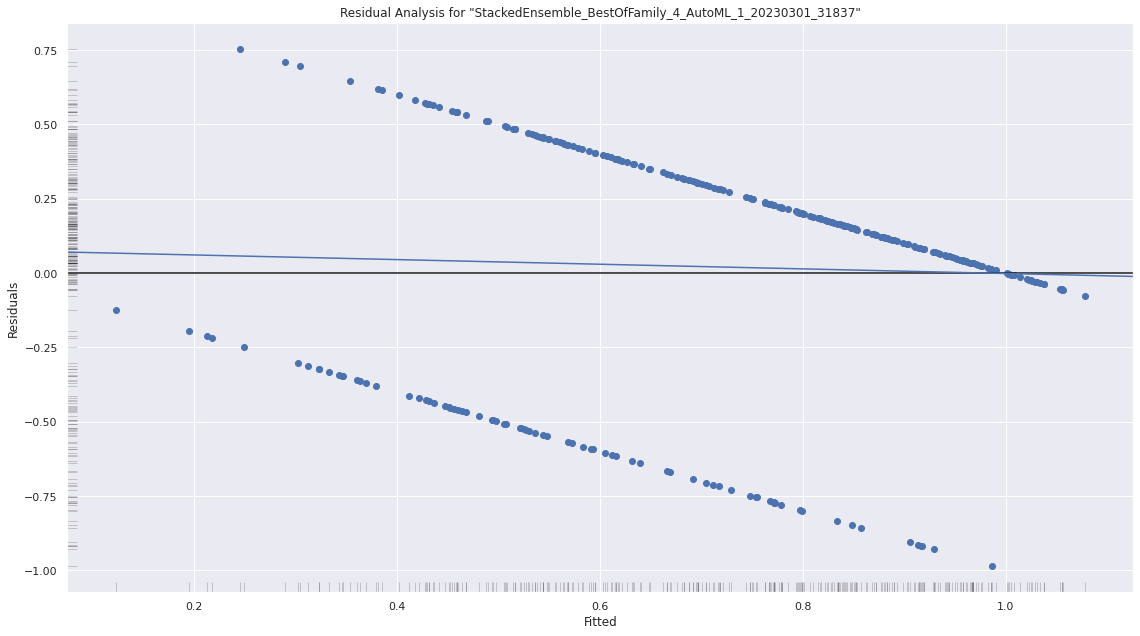

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

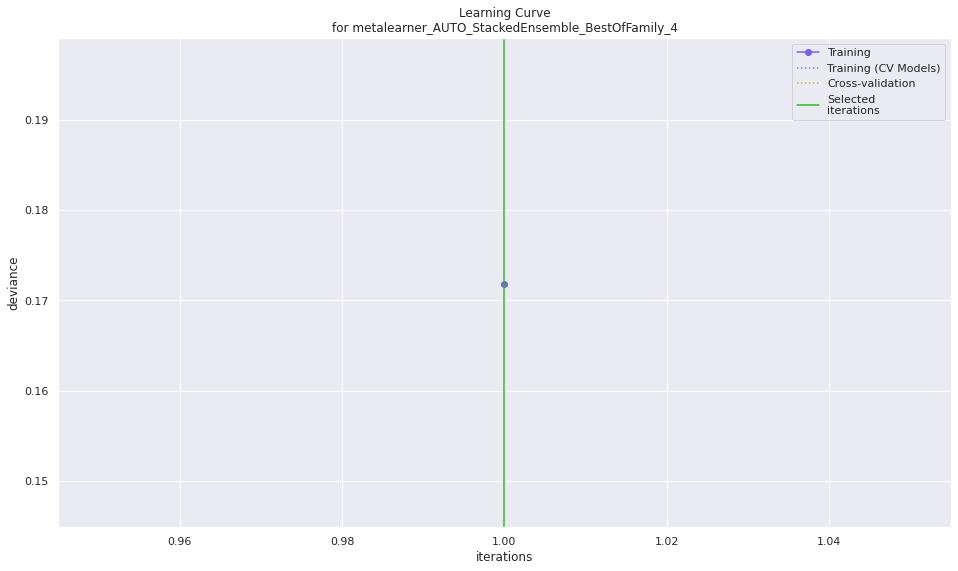

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

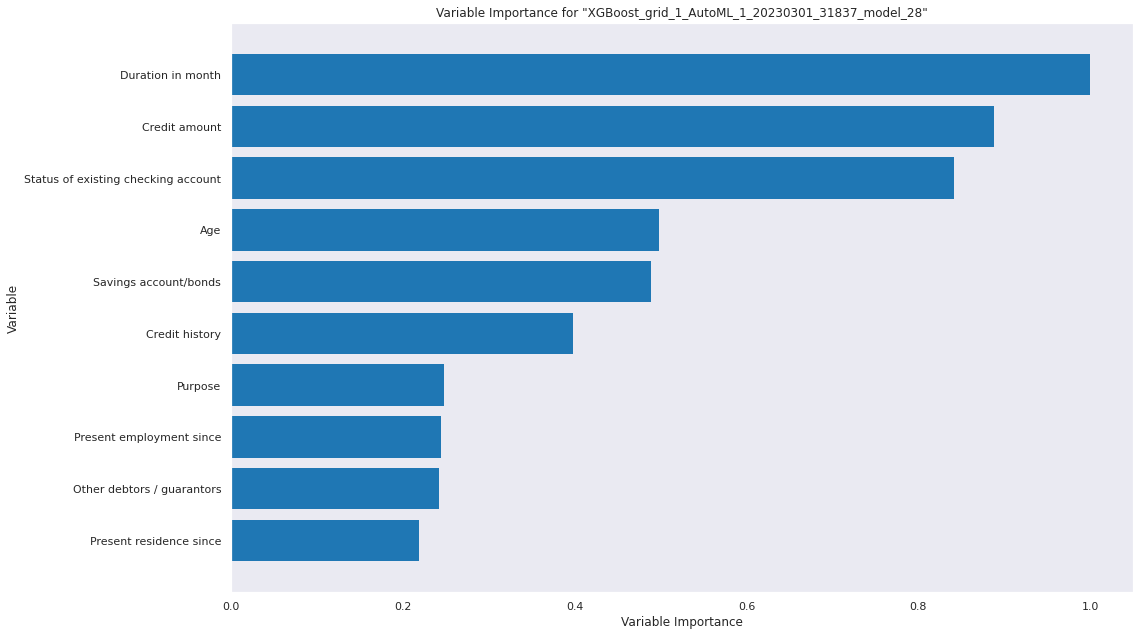

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

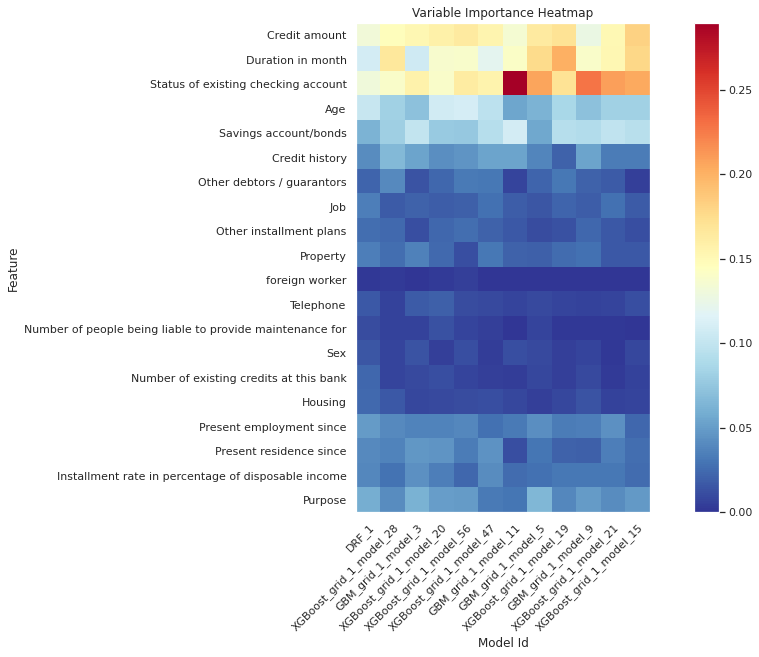

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

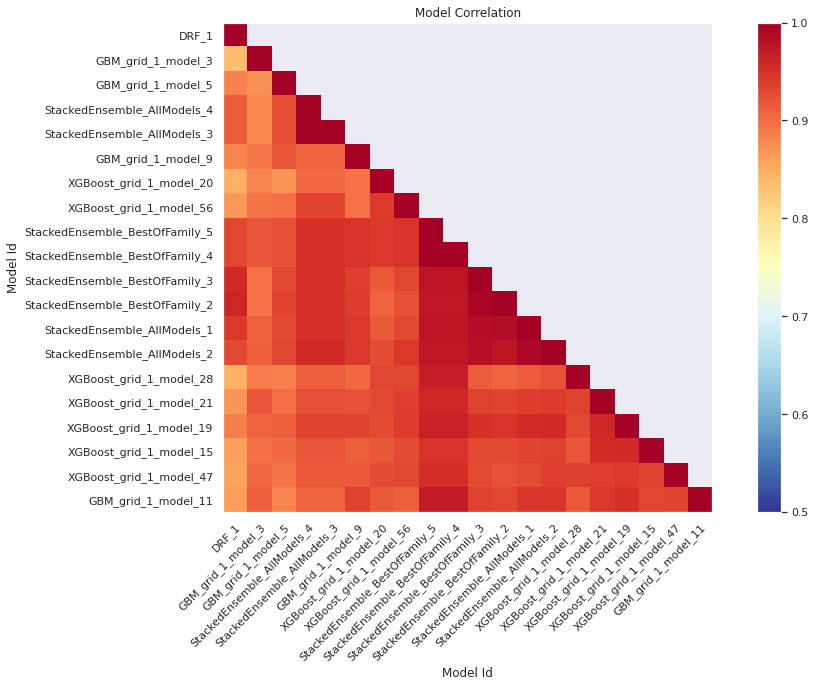

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

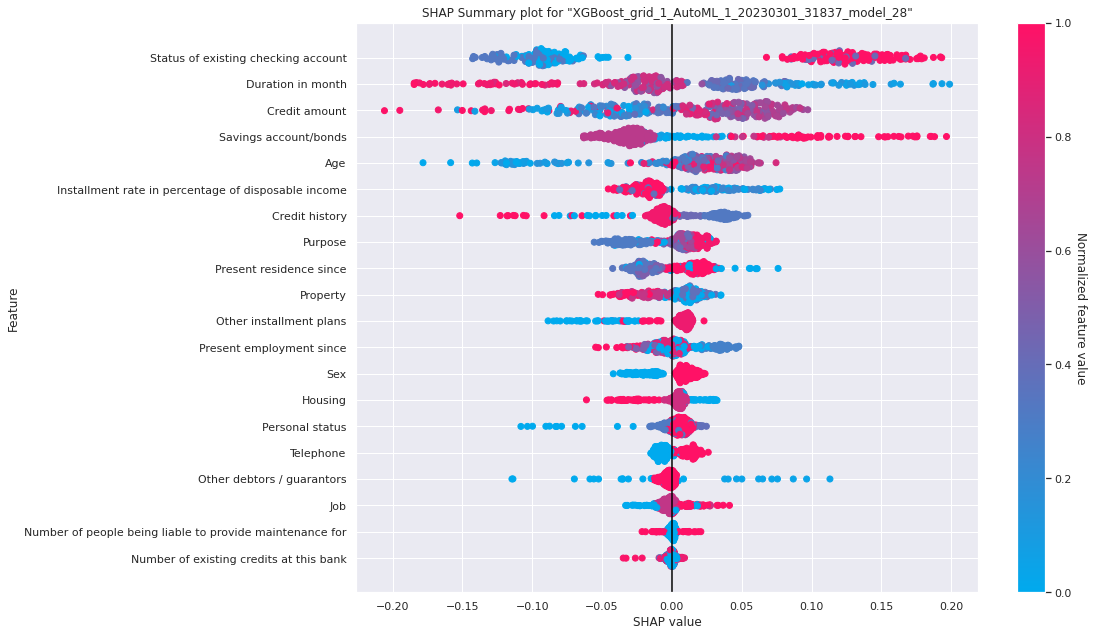

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

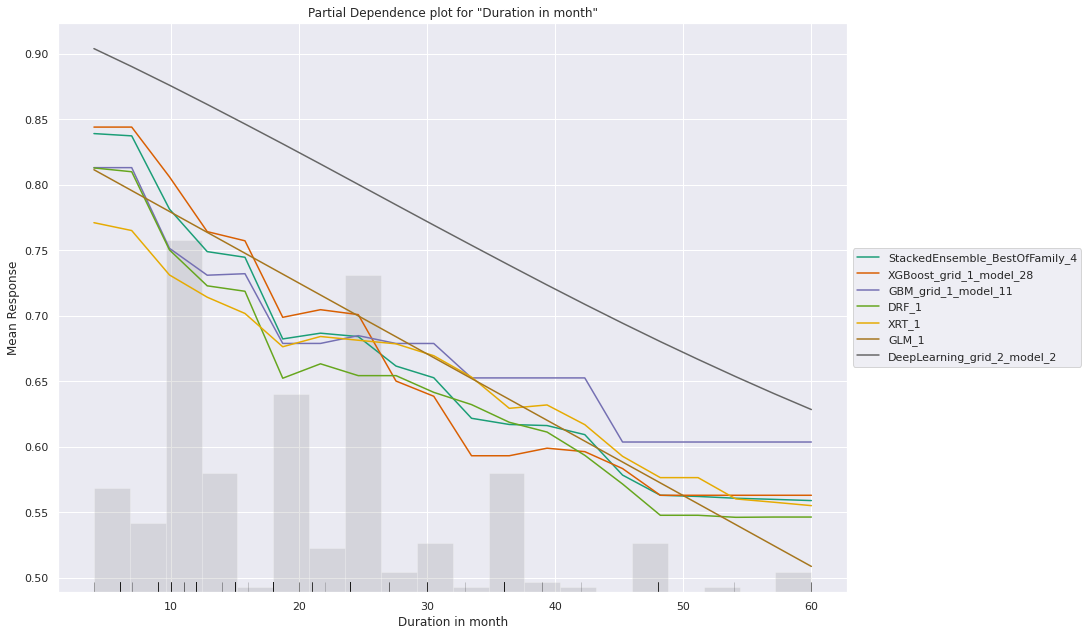

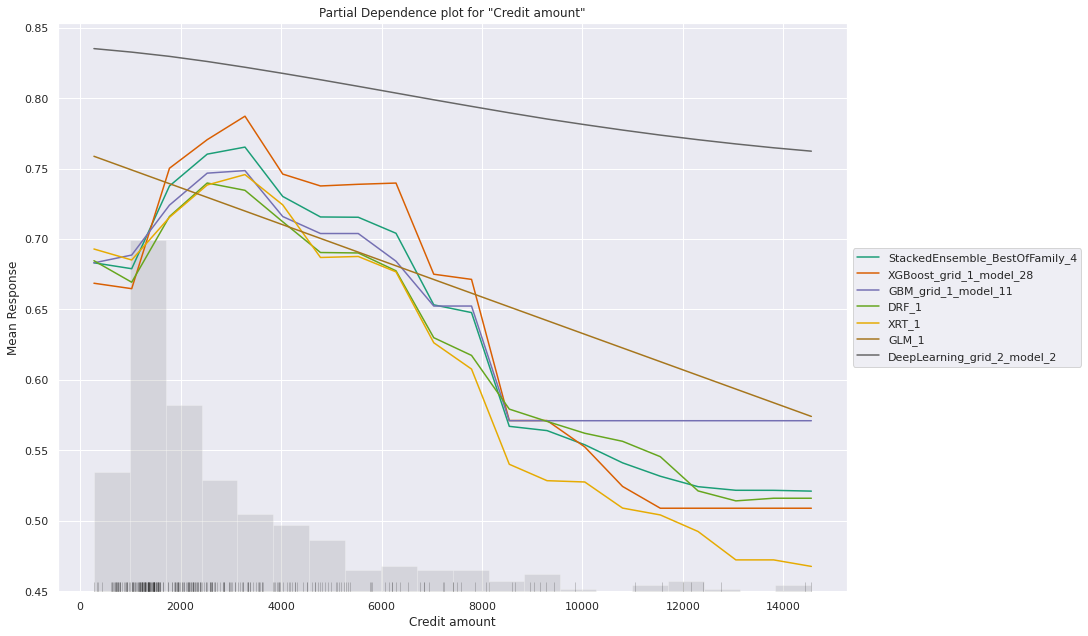

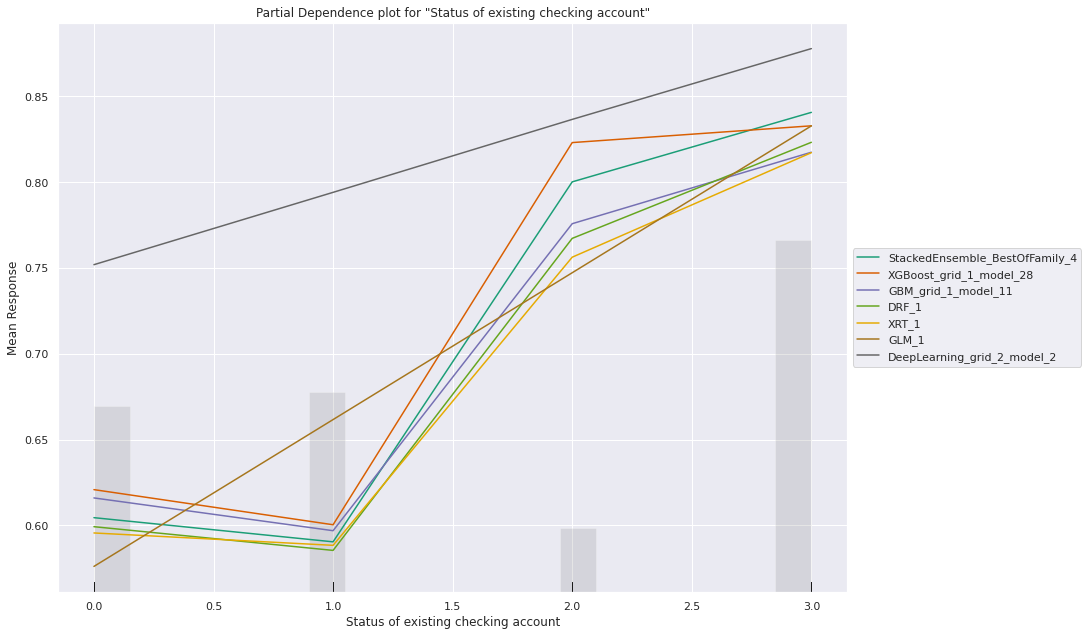

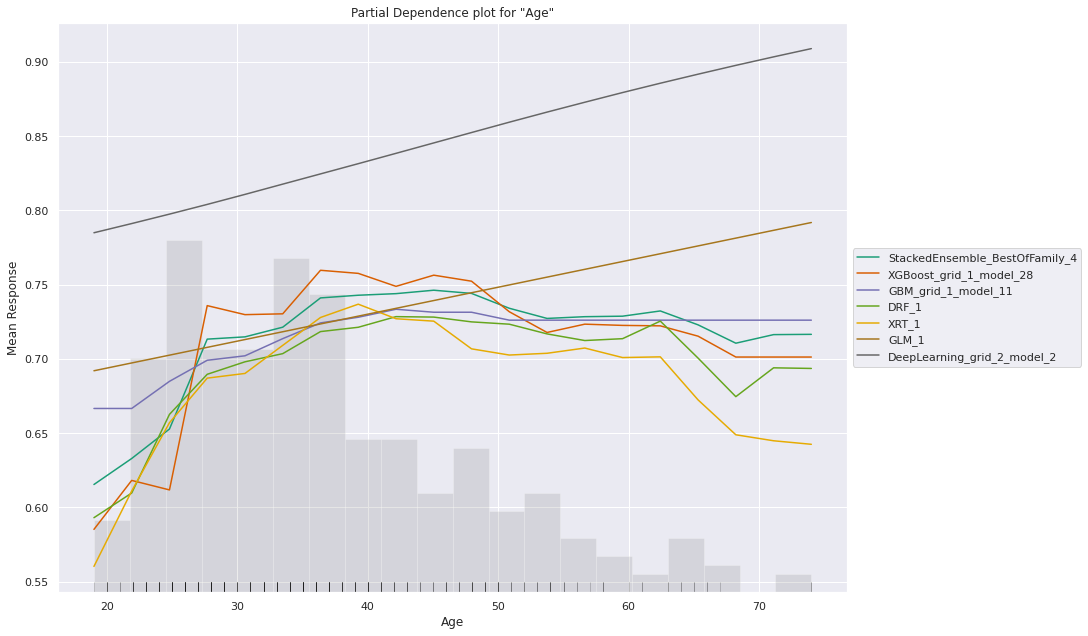

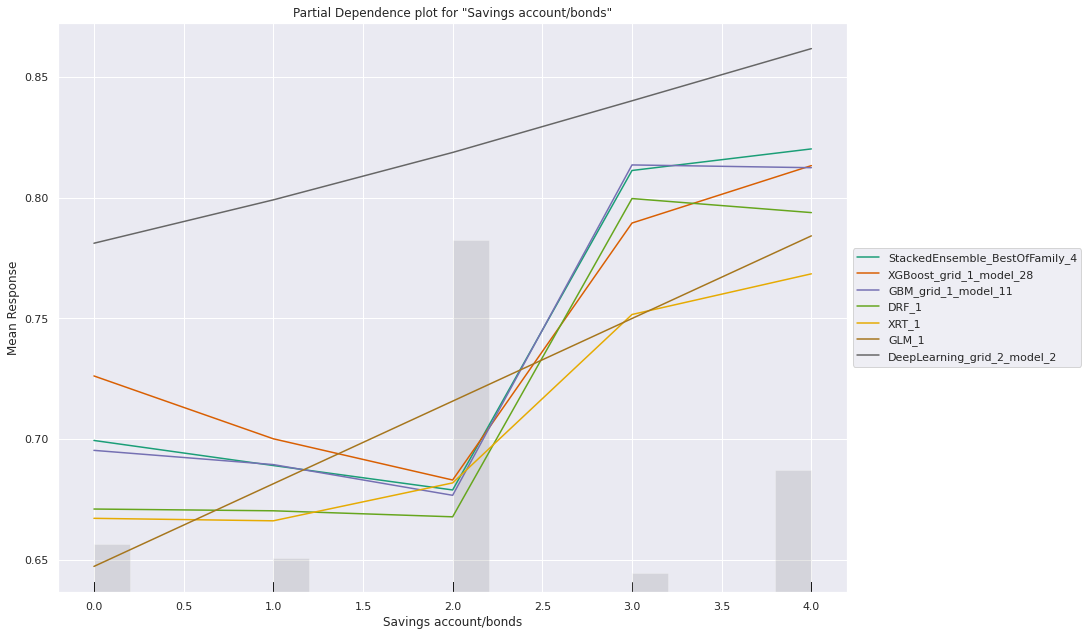

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

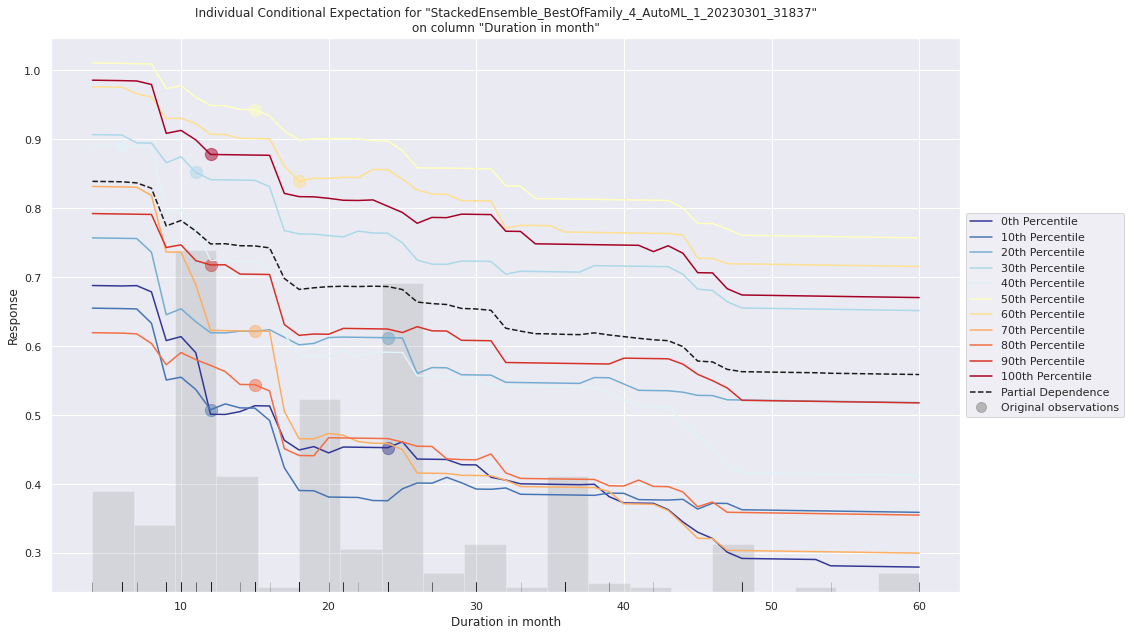

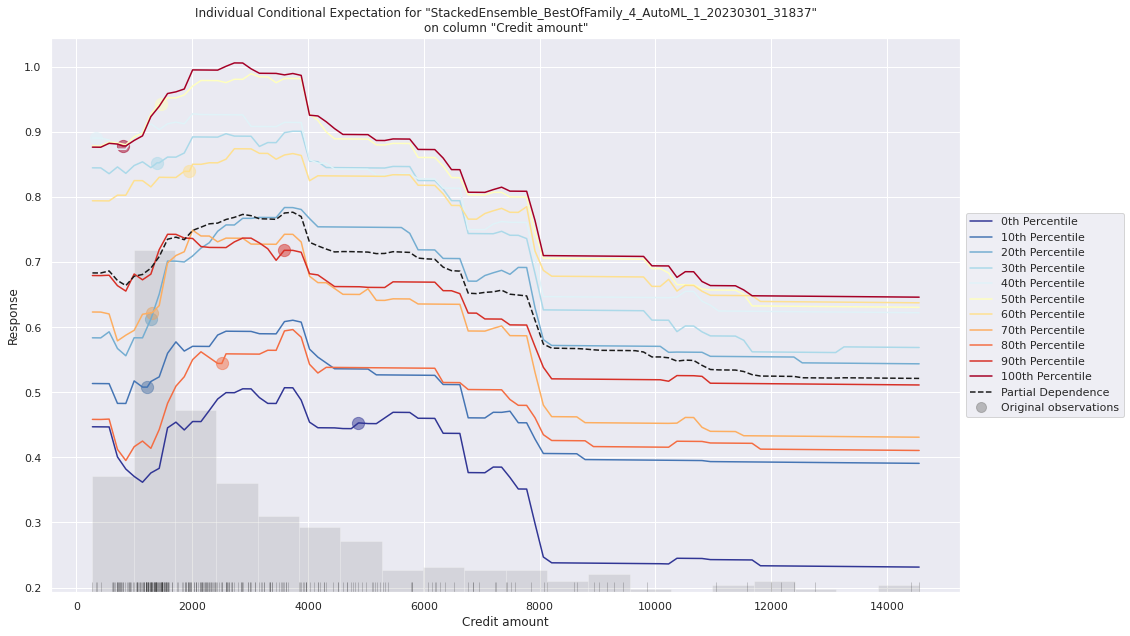

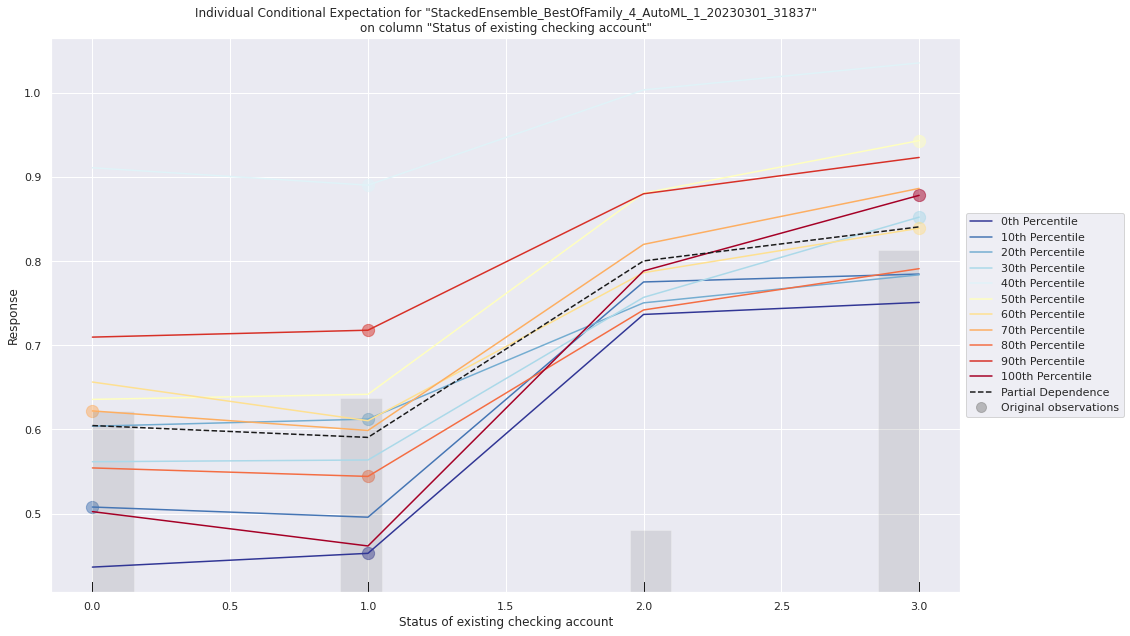

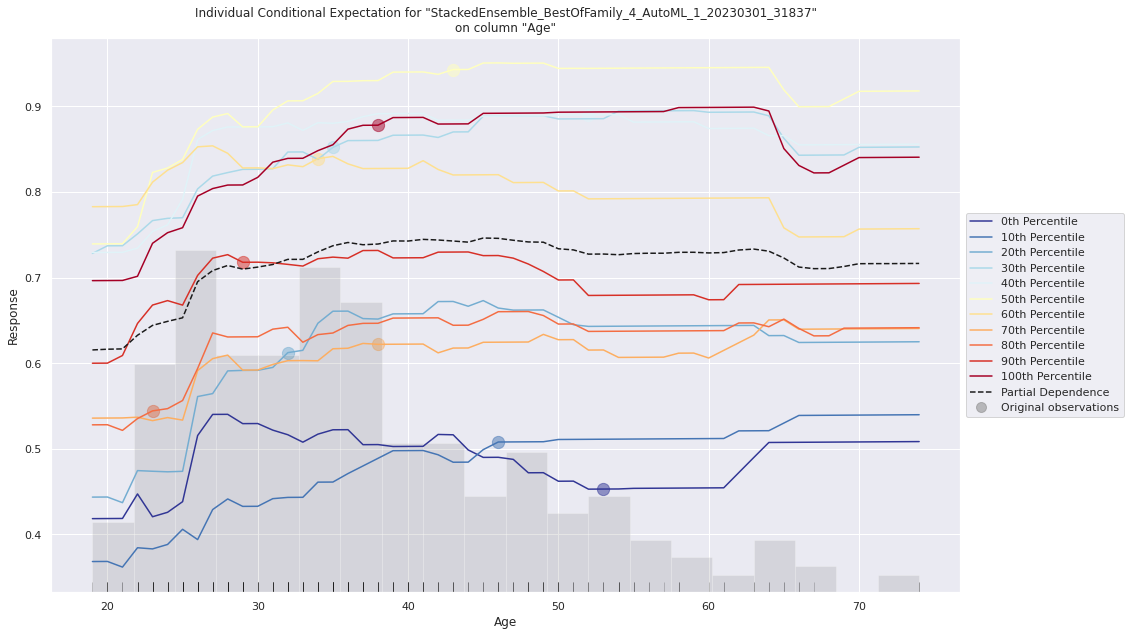

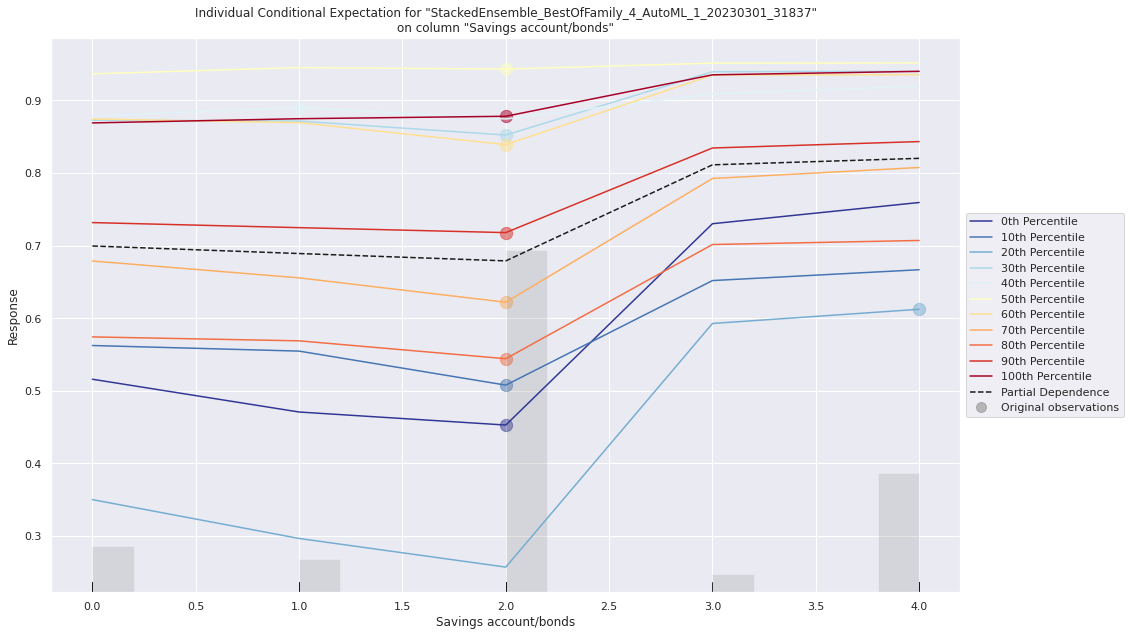

In [ ]:
exa = aml.explain(h2odf_test)

In [ ]:
train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))])
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [ ]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}


In [ ]:
from h2o.grid.grid_search import H2OGridSearch
gbm_grid2 = H2OGridSearch(model = H2OGradientBoostingEstimator, grid_id="gbm_grid2", hyper_params=gbm_parameters, search_criteria=search_criteria,)

In [ ]:
gbm_grid2.train(x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.8,0.03,5.0,0.5,gbm_grid2_model_12,0.1585640
,0.9,0.03,10.0,0.5,gbm_grid2_model_21,0.1600389
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,0.1600848
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,0.1602330
,0.6000000,0.09,3.0,0.8,gbm_grid2_model_1,0.1607450
,0.1,0.07,7.0,0.8,gbm_grid2_model_9,0.1626659
,0.2,0.02,10.0,0.5,gbm_grid2_model_25,0.1627112
,0.6000000,0.09,3.0,0.9,gbm_grid2_model_18,0.1634746
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,0.1637247
,0.7000000,0.07,2.0,0.6000000,gbm_grid2_model_32,0.1642094


In [ ]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)


In [ ]:
gbm_gridperf2


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.8,0.03,5.0,0.5,gbm_grid2_model_12,0.1585640
,0.9,0.03,10.0,0.5,gbm_grid2_model_21,0.1600389
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,0.1600848
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,0.1602330
,0.6000000,0.09,3.0,0.8,gbm_grid2_model_1,0.1607450
,0.1,0.07,7.0,0.8,gbm_grid2_model_9,0.1626659
,0.2,0.02,10.0,0.5,gbm_grid2_model_25,0.1627112
,0.6000000,0.09,3.0,0.9,gbm_grid2_model_18,0.1634746
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,0.1637247
,0.7000000,0.07,2.0,0.6000000,gbm_grid2_model_32,0.1642094


In [ ]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]


In [ ]:
models = gbm_gridperf2.models


In [ ]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [ ]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [ ]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)


In [ ]:
print(hyperparameters_dataframe)


   col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0              0.8        0.03          5          0.5           0.158564
1              0.9        0.03         10          0.5           0.160039
2              0.8        0.06          9          0.6           0.160085
3              0.2        0.04          5          0.9           0.160233
4              0.6        0.09          3          0.8           0.160745
5              0.1        0.07          7          0.8           0.162666
6              0.2        0.02         10          0.5           0.162711
7              0.6        0.09          3          0.9           0.163475
8              0.1        0.08          3          0.8           0.163725
9              0.7        0.07          2          0.6           0.164209


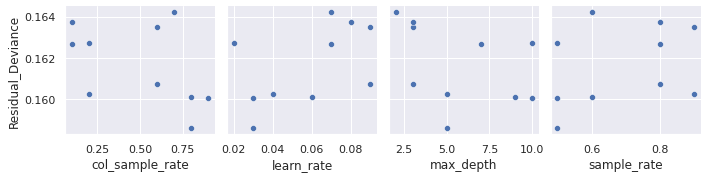

In [ ]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)